# Assignment Code: DA-AG-015
## Boosting Techniques | Assignment
Instructions: Carefully read each question. Use Google Docs, Microsoft Word, or a similar tool
to create a document where you type out each question along with its answer. Save the
document as a PDF, and then upload it to the LMS. Please do not zip or archive the files before
uploading them. Each question carries 20 marks.

Total Marks: 200

Question 1:  What is Boosting in Machine Learning? Explain how it improves weak
learners.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

Question 3: How does regularization help in XGBoost?

Question 4: Why is CatBoost considered efficient for handling categorical data?

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)
  
Question 7:  Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)


# Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners.
Answer:

Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to form a strong learner. A weak learner is a model that performs only slightly better than random guessing.

Boosting works by training models sequentially. Each new model focuses more on the data points that were misclassified by previous models. By giving higher importance to difficult samples and combining the predictions of all models (usually through weighted voting or summation), boosting reduces bias and improves overall predictive performance.

# Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
Answer:

AdaBoost trains models sequentially by increasing the weight of misclassified samples so that subsequent models focus more on those errors. It uses weighted voting to combine models.

Gradient Boosting trains models sequentially by fitting each new model to the residual errors (gradients) of the previous model using a defined loss function. It is more flexible, supports different loss functions, and is generally more robust to noise than AdaBoost.

# Question 3: How does regularization help in XGBoost?
Answer:

Regularization in XGBoost helps prevent overfitting by penalizing complex models. XGBoost uses L1 (Lasso) and L2 (Ridge) regularization on tree leaf weights, which discourages overly deep trees and large weights. This improves generalization, reduces model variance, and makes predictions more stable on unseen data.

# Question 4: Why is CatBoost considered efficient for handling categorical data?
Answer:

CatBoost is efficient for categorical data because it uses ordered target encoding instead of one-hot encoding. This avoids data leakage, handles missing values automatically, reduces dimensionality, and improves training speed and accuracy. It also maintains consistent performance on datasets with many categorical features.

# Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
Answer:

Boosting techniques are preferred over bagging in applications where high accuracy and handling complex patterns are critical. Examples include credit risk and loan default prediction, fraud detection, medical diagnosis, customer churn prediction, recommendation systems, and search ranking systems.

# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


# Question 7: Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R2 Score:", r2)


Gradient Boosting Regressor R2 Score: 0.7756446042829697


# Question 8: Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy


In [3]:
!pip install xgboost


In [4]:
# Re-load Breast Cancer dataset (IMPORTANT)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define XGBoost Classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)

print("Best Parameters:", grid.best_params_)
print("XGBoost Classifier Accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:18] WARNING: /w

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
XGBoost Classifier Accuracy: 0.956140350877193


# Question 9: Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn


In [5]:
!pip install catboost seaborn


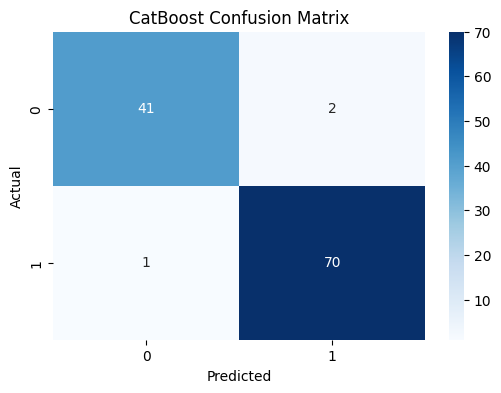

In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=False
)
cat_model.fit(X_train, y_train)

# Predictions
y_pred = cat_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


# Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
Answer:

Data Preprocessing & Handling Missing/Categorical Values:

Handle missing numerical values using median imputation.

Use CatBoost to automatically handle categorical features and missing values.

Address class imbalance using class weights or scale_pos_weight.

Choice Between AdaBoost, XGBoost, or CatBoost:

CatBoost is preferred due to its native handling of categorical features, robustness to missing values, and strong performance on imbalanced datasets.

Hyperparameter Tuning Strategy:

Use GridSearchCV or Optuna to tune learning rate, depth, and number of iterations.

Use cross-validation to ensure generalization.

Evaluation Metrics:

ROC-AUC to evaluate ranking quality.

Recall to identify maximum defaulters.

Precision to reduce false positives.

F1-score for balanced performance.

Business Benefit:

Reduced loan default risk.

Improved credit decision-making.

Lower financial losses.

Better regulatory compliance and explainability.

In [7]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    auto_class_weights='Balanced',
    verbose=False
)

model.fit(X_train, y_train)
